# **LetsGrowMore Virtual Internship Program**
# Author :- Vedant Gadhavi
# Advance Level
# Task 1 :- Develop A Neural Network That Can Read Handwriting.ipynb

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tensorflow import keras 
import pandas as pd
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Data

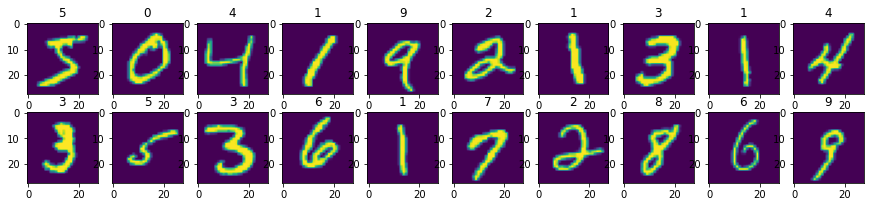

In [4]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]))
  ax.set_title(y_train[i])

Data splitting

In [5]:
xtrain = x_train/255.0
xtest = x_test/255.0

Data modelling

In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1  = model.fit(xtrain, y_train, epochs = 5, verbose = 1, validation_data = (xtest, y_test))

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2637 - accuracy: 0.9245 - val_loss: 0.1426 - val_accuracy: 0.9587
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1174 - accuracy: 0.9654 - val_loss: 0.1038 - val_accuracy: 0.9701
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0816 - accuracy: 0.9755 - val_loss: 0.0894 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0610 - accuracy: 0.9810 - val_loss: 0.0794 - val_accuracy: 0.9769
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0465 - accuracy: 0.9855 - val_loss: 0.0773 - val_accuracy: 0.9779


In [8]:
score = model.evaluate(xtest, y_test, verbose = 0 )
print("Test accuracy: ", score[1])

Test accuracy:  0.9779000282287598


Data Visualization

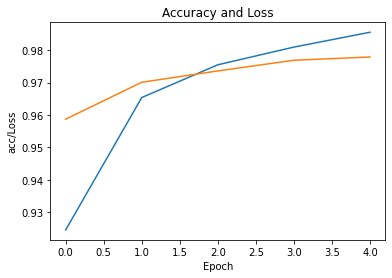

In [9]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history1.history['accuracy'],label='acc')
plt.plot(history1.history["val_accuracy"],label='val')
plt.show()

Data Testing

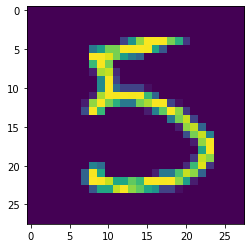

In [10]:
plt.imshow(np.squeeze(x_test[15]))

In [11]:
prediction=model.predict(x_test)
print(np.argmax(prediction[15]))

5
